# Lab 10
# Sentiment Analysis and Text Classification with LSTM using spaCy

## 14.1 Introduction

This lab discusses a vital component of NLP implementation: text classification and the application on sentiment analysis.

You will first learn how to train spaCy's text classifier component, TextCategorizer. For this, you will learn how to prepare data and feed the data to the classifier; then we'll proceed to train the classifier.

You will also practice your new TextCategorizer skills on a popular dataset for sentiment analysis.

Next, you will learn how to do text classification with two vital Python frame-works: TensorFlow Keras API and spaCy technology.

You will also learn the basics of neural networks, sequential data modeling with LSTM Technology, and how to process text for machine learning tasks with Keras's text preprocessing module. You will also practice how to implement a neu-ral network with tf.keras as well.

Following that, we will implement a step-by-step text classification system, starting with data acquisition to text preprocessing by using Keras tokenizer, neural network configuration, network training, testing and system evaluation.

This lab will cover the following key topics:
- Basic concept and knowledge of text classification
- Model training of spaCy text classifier
- Sentiment Analysis with spaCy
- Sequential modeling with LSTM Technology


## 14.2 Technical Requirements

The code in the sections Training the spaCy text classifier and Sentiment analysis with spaCy is spaCy v3.0 compatible.

The section Text classification with spaCy and Keras requires the following Python libraries:
- TensorFlow (version 2.3 or above)
- NumPy
- pandas
- Matplotlib

If you haven't install these packages into your own PC/notebook, do that using: <font color='blue'>pip install xxx </font>command.

## 14.3 Text Classification in a Nutshell

### What is Text Classfication?

Text Classification is the task of assigning a set of predefined labels to text. By using a batch of predefined text classes or categories, such as “like” or “unlike” comments in classical sentiment analysis in Facebook. One might want to know an online comments belongs to which catego-ry or sentiment class. In the past, all these text classifications (sentiment analysis) are done by manual tagging and classification. Now, we try to machine learning technique to “train” the classification system with known examples (so-called training samples) in order to classify the “unseen” cases.

For example: A customer review on a movie in IMDB can be positive, negative, or neutral.

In real world applications, such Text Classification systems also commonly used for automatic detection of spam emails, determining the sentiment of cus-tomer's reviews, understanding customer's intent even sorting customer's com-plaint tickets or other practical applications.

In fact, text classification is a fundamental task of NLP. Owing to the fast-growing of social media such as Facebook or Wechat. It is gaining importance in the business world, as it enables businesses to automate their processes.

One immediate example is spam filters. Every day, users receive many spam emails but most of the time never see these emails and don't get any notifications because spam filters save the users from bothering about irrelevant emails and from spending time deleting these emails.

Another very popular application of Text classification is sentiment analysis in popular social media such as Wechat and Facebook. By using various machine learning method such as LSTM Technology for automatic analysis of dialogues between users, the system can analyze the views/comments/opinions of certain issue such as the sentiment analysis in Facebook on the popularity of Donald Trump during presidential election years before.

Text Classifiers can come in different flavors. Some classifiers focus on the overall emotion of the text, some classifiers focus on detecting the language of the text, and some classifiers focus on only some words of the text, such as verbs.

The following are some of the most common types of text classification and their use cases:
1. Language detection: Language detection is the first step of many NLP sys-tems, such as machine translation.
2. Topic generation: Topic generation (and detection) refers to the process of the summarization (or classification) of a batch of sentence, paragraphs or texts into certain TOI (Topic of Interest) or topic title. For example, the text in a customer email could be asking about a refund, asking for a past bill, or simply complaining about the customer service.
3. Sentiment analysis: In the world of social media, sentiment analysis is a vi-tal task to classify (or analyze) the user’s responses, comments and mes-sages on a particular topic that belongs to certain classes such as: positive, neutral or negative emotions; like or dislike, etc. Sentiment analysis is also commonly used to analyze customer reviews about products and services, now become a very essential task in e-commerce and social media.

The following figure shows a text classifier for a customer service automation system (Fig. 14.1):

<img src="./Fig 14.1.jpg" width = "600" height = "" alt="Fig1" align=center />
Fig 14.1 Example of Top Detection for customer complain in CSAS (Customer Service Automation System)


### Text Classification as AI Applications

In terms of AI technology, text classification can be considered as Supervised-Learning (SL) AI task.

It means that the classifier can predict the class label of a text based on sample input text-class label pairs.

In other words, like any SL machine learning application, text classification must need sufficient databank of input(text)-output(classified labels) pairs for network training, testing and validation.

Hence, to train a text classifier, we need a labeled dataset. A labeled dataset is basically a list of text-label pairs. Here is an example dataset of five training sen-tences with their labels (Fig. 14.2):

<img src="./Fig 14.2.jpg" width = "600" height = "" alt="Fig2" align=center/>
Fig 14.2  Sample input texts and their corresponding output class labels

Then we train the classifier by showing the text and the corresponding class la-bels to the classifier.

When the classifier sees new text that was not in the training text, it then predicts the class label of this unseen text based on the examples it saw during the training phase. The output of a text classifier is always a class label.

Text classification can also be divided into three categories depending on the number of classes used:
1. Binary text classification means that we want to categorize our text into two classes.
2. Multi-class text classification means that there are more than two classes. Each class is mutually exclusive – one text can belong to one class only. Equivalently, a training instance can be labeled with only one class label. An example is rating customer reviews. A review can have 1, 2, 3, 4, or 5 stars (each star category is a class).
3. Multi-label text classification system is a generalization its multi-class coun-terpart, whereas these multi-labels can be assigned to each example text. For example, classifying negative social media messages is done with multi-labels. This way, our model can distinguish different levels of negative emotions. Class labels (categories) are typically toxic, severe toxic, insult, threat, ob-scenity. A message can include both insults and threats, or be classed as insult, toxicity, and obscenity, and so on. Hence for this problem, using multiple classes is more suitable.



### What are Labels in Text Classification?

Labels are the name of the classes we want to see as the output.

A class label can be categorical (string) or numerical (a number).

Here are some commonly used class labels in Text Classfication:
- For sentiment analysis, we usually use the class labels positive and negative. Their abbreviations, pos and neg, are also commonly used. Binary class labels are popular as well – 0 means negative sentiment and 1 means positive sentiment.
- The same applies to binary classification problems. We usually use 0-1 for class labels.
- For multiclass and multilabel problems, we usually name the classes with a meaningful name. For a movie genre classifier, we can use the labels family, international, Sunday evening, Disney, action, and so on. Numbers are used as labels as well. For a five-class classification problem, we can use the labels 1, 2, 3, 4, and 5.

Now we've covered the basic concepts of text classification, let's do some coding! In the next section, we'll explore how to train spaCy's text classifier component.

## 14.4 Training Text Classifier with spaCy NLP Pipeline

In this section, we will learn about the details of spaCy's text classifier component TextCategorizer (tCategorizer).

TextCategorizer is an optional and trainable pipeline component. In order to train it, we need to provide examples and their class labels. We first add TextCat-egorizer to the NLP pipeline and then do the training procedure.

Fig. 14.3 shows where exactly the TextCategorizer component lies in the NLP pipeline; this component comes after the essential components.

In the following diagram, textcat refers to the TextCategorizer component.

<img src="./Fig 14.3.jpg" width = "600" height = "" alt="Fig3" align=center />
Fig 14.3 TextCategorizer in the spaCy NLP pipeline

In practice, a neural network architecture lies behind spaCy's TextCategorizer.

TextCategorizer provides us with user-friendly and end-to-end approaches to train the classifier, so that we don't have to deal with the neural network architec-ture directly. We'll design our own neural network architecture in the upcoming Text classification with spaCy and Keras section.

After looking at the architecture, we’re ready to dive into TextCategorizer code. Let’s get to know TextCategorizer class first.


### 14.4.1 TextCategorizer class

Now let's get to know the <font color='blue'>TextCategorizer</font> class in detail.

First thing first, import spaCy and load the nlp component from "en_core_web_md" first.

In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 40.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load and import spacy package
import spacy
# Load the en_core_web_md module
nlp = spacy.load("en_core_web_md")

Next, we import <font color='blue'>TextCategorizer</font> from the <font color='blue'>spaCy</font> pipeline components:

In [ ]:
# Import the Single Textcat Model
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

<font color='blue'>TextCategorizer</font> is available in two flavors, <font color='blue'>single-label classifier</font> and <font color='blue'>multilabel classifier</font>.

As we remarked in the previous section, a multilabel classifier can predict more than one class. A single-label classifier predicts only one class for each example and classes are mutually exclusive.

The preceding import line imports the single-label classifier and the following code imports the multilabel classifier:

In [ ]:
# Import the Mutli-TextCat Model
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL

Next, we need to provide a configuration to the <font color='blue'>TextCategorizer</font> component.

We provide two parameters here, a threshold value and a model name (either Single or Multi depending on the classification task).

<font color='blue'>TextCategorizer</font> internally generates a probability for each class and a class is assigned to the text if the probability of this class is higher than the threshold value.

A traditional threshold value for text classification is 0.5, however, if you want to make a prediction with higher confidence, you can make the threshold higher, such as 0.6, 0.7, or 0.8.

Putting it altogether, we can add a single-label <font color='blue'>TextCategorizer (tCategorizer) </font> component to the nlp pipeline as follows:

In [ ]:
# Import the Single Textcat Model
# Define the model parameters: threshold and model
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL
config = {
    "threshold": 0.5,
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL
}

In [ ]:
# Define the Textcat object (tCategorizer)
tCategorizer = nlp.add_pipe("textcat", config=config)

Take a quick look on the <font color='blue'>tCategorizer</font>:

In [ ]:
tCategorizer

Adding a multilabel component to the nlp pipeline is similar:

In [ ]:
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL
config = {
    "threshold": 0.5,
    "model": DEFAULT_MULTI_TEXTCAT_MODEL
}

In [ ]:
tCategorizer = nlp.add_pipe("textcat_multilabel", config=config)

In [ ]:
tCategorizer

<img src="./note.png" width = "" height = "" alt="note" align=left />

In the last line of each of the preceding code blocks, we added a <font color='blue'>TextCategorizer</font> pipeline component to the nlp pipeline object.
The newly created <font color='blue'>TextCategorizer</font> component is captured by the textcat variable.

Now, We're ready to train the <font color='blue'>TextCategorizer</font> component.

### 14.4.2 Formatting training data for the TextCategorizer

Let's start our code by preparing a small training set.

We'll prepare a customer sentiment dataset for <font color='blue'>Binary Text Classification</font>.

The label will be called <font color='blue'>sentiment</font> and can obtain two possible values, 0 and 1 corresponding to negative and positive sentiment.

The following training set contains 6 examples from IMDB, 3 being positive and 3 being negative:

In [ ]:
movie_comment1 = [
    ("This movie is perfect and worth watching. ",{"cats": {"Positive Sentiment": 1}}),
    ("This movie is great, the performance of Al Pacino is brilliant.", {"cats": {"Positive Sentiment": 1}}),
    ("A very good and funny movie. It should be the best this year!", {"cats": {"Positive Sentiment": 1}}),
    ("This movie is so bad that I really want to leave after the first hour watching.", {"cats": {"Positive Sentiment": 0}}),
    ("Even free I won't see this movie again. Totally failure!", {"cats": {"Positive Sentiment": 0}}),
    ("I think it is the worst movie I saw so far this year.", {"cats": {"Positive Sentiment": 0}})
]

Check on any movie_comment1 element:

In [ ]:
movie_comment1 [1]

('This movie is great, the performance of Al Pacino is brilliant.',
 {'cats': {'Positive Sentiment': 1}})

<img src="./note.png" width = "" height = "" alt="note" align=left />

- Each training example (movie_coment1) is a tuple object con-sist of a text and a nested dictionary.
- The dictionary contains the class category in a format that spaCy recognizes.
- The cats field means the categories.
- Then we include the class category sentiment and its value. The value should always be a floating-point number.


In the code, we will introduce the class label we choose to the TextCategorizer component. Let's see the complete code.

First, we do the necessary imports:

In [ ]:
import random
import spacy
from spacy.training import Example
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

<img src="./note.png" width = "" height = "" alt="note" align=left />

- We imported the built-in library random for shuffling our dataset.
- We imported spacy as usual, and we imported <font color='blue'>Example</font> to prepare the training examples in spaCy format.
- In the last line of the code block, we imported a text categorizer model.

Next, we'll do the pipeline and TextCategorizer component initialization:

Now, we'll do some work on the newly created <font color='blue'>TextCategorizer</font> component, textcat.

We'll introduce our label sentiment to the <font color='blue'>TextCategorizer</font> componenet by calling add_label.

Then, we need to initialize this component with our examples.

The following code adds our label to the <font color='blue'>TextCategorizer</font> component and then initializes the <font color='blue'>TextCategorizer</font> model's weights with the training examples:

In [ ]:
import random
import spacy
from spacy.training import Example
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

nlp = spacy.load('en_core_web_md')

config = {
    "threshold": 0.5,
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL
}

tCategorizer = nlp.add_pipe("textcat", config=config)

Let's have a look on the <font color='blue'>pipe_names</font>:

In [ ]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'textcat']

Now, we'll do some work on the newly created <font color='blue'>TextCategorizer</font> component, textcat. We'll introduce our label sentiment to the <font color='blue'>TextCategorizer</font> componenet by calling add_label. Then, we need to initialize this component with our examples.

The following code adds our label to the TextCategorizer component and then initializes the TextCategorizer model's weights with the training examples (movie_comment_exp)::

In [ ]:
tCategorizer.add_label("Positive Sentiment")
tCategorizer.add_label("Negative Sentiment")

movie_comment_exp = [Example.from_dict(nlp.make_doc(comments), category) for comments,category in movie_comment1]
tCategorizer.initialize(lambda: movie_comment_exp, nlp=nlp)

Let's have a look on the <font color='blue'>movie_comment_exp</font>:

In [ ]:
movie_comment_exp

[{'doc_annotation': {'cats': {'Positive Sentiment': 1}, 'entities': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], 'spans': {}, 'links': {}}, 'token_annotation': {'ORTH': ['This', 'movie', 'is', 'perfect', 'and', 'worth', 'watching', '.'], 'SPACY': [True, True, True, True, True, True, False, True], 'TAG': ['', '', '', '', '', '', '', ''], 'LEMMA': ['', '', '', '', '', '', '', ''], 'POS': ['', '', '', '', '', '', '', ''], 'MORPH': ['', '', '', '', '', '', '', ''], 'HEAD': [0, 1, 2, 3, 4, 5, 6, 7], 'DEP': ['', '', '', '', '', '', '', ''], 'SENT_START': [1, 0, 0, 0, 0, 0, 0, 0]}},
 {'doc_annotation': {'cats': {'Positive Sentiment': 1}, 'entities': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], 'spans': {}, 'links': {}}, 'token_annotation': {'ORTH': ['This', 'movie', 'is', 'great', ',', 'the', 'performance', 'of', 'Al', 'Pacino', 'is', 'brilliant', '.'], 'SPACY': [True, True, True, False, True, True, True, True, True, True, True, False, False], 'TAG': ['', '', '', '', '', ''

### 14.4.3 System Training

We're ready to define the training loop.

First of all, we'll disable other pipe components so that only textcat will be trained.

Second, we will create an optimizer object by calling resume_training, keeping the weights of the existing statistical models.

For each epoch, we go over training examples one by one and update the weights of textcat. We go over the data for 20 epochs.

Try the whole program together with the training loop:

In [ ]:
movie_comment1

[('This movie is perfect and worth watching. ',
  {'cats': {'Positive Sentiment': 1}}),
 ('This movie is great, the performance of Al Pacino is brilliant.',
  {'cats': {'Positive Sentiment': 1}}),
 ('A very good and funny movie. It should be the best this year!',
  {'cats': {'Positive Sentiment': 1}}),
 ('This movie is so bad that I really want to leave after the first hour watching.',
  {'cats': {'Positive Sentiment': 0}}),
 ("Even free I won't see this movie again. Totally failure!",
  {'cats': {'Positive Sentiment': 0}}),
 ('I think it is the worst movie I saw so far this year.',
  {'cats': {'Positive Sentiment': 0}})]

In [ ]:
# Full implementation of the Movie Sentiment Analysis System
import random
import spacy
from spacy.training import Example
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

nlp = spacy.load('en_core_web_md')

config = {
    "threshold": 0.5,
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL
}

tCategorizer = nlp.add_pipe("textcat", config=config)

tCategorizer.add_label("Positive Sentiment")
tCategorizer.add_label("Negative Sentiment")

movie_comment_exp = [Example.from_dict(nlp.make_doc(comments), category) for comments,category in movie_comment1]
tCategorizer.initialize(lambda: movie_comment_exp, nlp=nlp)

epochs=20

losses = {}

with nlp.select_pipes(enable="textcat"):
    optimizer = nlp.resume_training()
    for i in range(epochs):
        random.shuffle(movie_comment1)
        for comments, category in movie_comment1:
            mdoc = nlp.make_doc(comments)
            exp = Example.from_dict(mdoc, category)
            nlp.update([exp], sgd=optimizer, losses=losses)
        print("Epoch #",i, "Losses: ",losses)

Epoch # 0 Losses:  {'textcat': 1.4792710095643997}
Epoch # 1 Losses:  {'textcat': 2.6308142691850662}
Epoch # 2 Losses:  {'textcat': 3.6676070149987936}
Epoch # 3 Losses:  {'textcat': 4.674441431649029}
Epoch # 4 Losses:  {'textcat': 5.741871039615944}
Epoch # 5 Losses:  {'textcat': 6.843784660042729}
Epoch # 6 Losses:  {'textcat': 7.804021488973376}
Epoch # 7 Losses:  {'textcat': 8.826249296340393}
Epoch # 8 Losses:  {'textcat': 9.695674010694347}
Epoch # 9 Losses:  {'textcat': 10.726456835920544}
Epoch # 10 Losses:  {'textcat': 11.514744136210311}
Epoch # 11 Losses:  {'textcat': 12.517857959471485}
Epoch # 12 Losses:  {'textcat': 13.28767119155691}
Epoch # 13 Losses:  {'textcat': 14.255417779423624}
Epoch # 14 Losses:  {'textcat': 15.075467424831459}
Epoch # 15 Losses:  {'textcat': 15.946973777783}
Epoch # 16 Losses:  {'textcat': 16.84092359114709}
Epoch # 17 Losses:  {'textcat': 17.62122811145673}
Epoch # 18 Losses:  {'textcat': 18.44872479542761}
Epoch # 19 Losses:  {'textcat': 19.

### 14.4.4 System Testing

Let's test the new text categorizer component.
The <font color='blue'>doc.cats</font> property holds the class labels:

In [ ]:
# Test 1: This movie sucks
test1 = nlp("This movie sucks and the worst I ever saw.")
test1.cats

{'Positive Sentiment': 0.9283635020256042,
 'Negative Sentiment': 0.07163646817207336}

In [ ]:
# Test 2: I'll watch it again, how amazing.
test2 = nlp("This movie really very great!")
test2.cats

{'Positive Sentiment': 0.9060717821121216,
 'Negative Sentiment': 0.0939282551407814}

<img src="./note.png" width = "" height = "" alt="note" align=left />

Great! <br>
Our small dataset successfully trained the spaCy text classifier for a binary text classification problem to perform correct sentiment analysis nicely. Now, we'll see how to perform multilabel classification.

### 14.4.5 Training TextCategorizer for multilabel classification


Recall from the first section that multilabel classification means the classifier can predict more than one label for an example text. Naturally, the classes are not mutually exclusive at all.

In order to train a multilabel classifier, we need to provide a dataset that contains examples that have more than one label.

To train spaCy's TextCategorizer for multilabel classification, we'll again start by building a small training set.

This time, we'll form a set of movie reviews, where the labels are:
- ACTION
- SCIFI
- WEEKEND

Here is our small dataset:

In [ ]:
movie_comment2 = [
    ("This movie is great for weekend watching.", {"cats": {"WEEKEND": True}}),
    ("This a 100% action movie, I enjoy it.", {"cats": {"ACTION": True}}),
    ("Avatar is the best Scifi movie I ever seen!"  , {"cats": {"SCIFI": True}}),
    ("Such a good Scifi movie to watch during the weekend!", {"cats": {"WEEKEND": True, "SCIFI":True}}),
    ("Matrix a great Scifi movie with a lot of action. Pure action, great!", {"cats": {"SCIFI": True, "ACTION": True}})
]

Check the data set first:

In [ ]:
movie_comment2

[('This movie is great for weekend watching.', {'cats': {'WEEKEND': True}}),
 ('This a 100% action movie, I enjoy it.', {'cats': {'ACTION': True}}),
 ('Avatar is the best Scifi movie I ever seen!', {'cats': {'SCIFI': True}}),
 ('Such a good Scifi movie to watch during the weekend!',
  {'cats': {'WEEKEND': True, 'SCIFI': True}}),
 ('Matrix a great Scifi movie with a lot of action. Pure action, great!',
  {'cats': {'SCIFI': True, 'ACTION': True}})]

In [ ]:
movie_comment2[1]

('This a 100% action movie, I enjoy it.', {'cats': {'ACTION': True}})

In the dataset, we provided some examples with one label, such as the first ex-ample (the first sentence of movie_comment2, the second line of the preceding code block), and we also provided examples with more than one label, such as the fourth example of the movie_comment2.

We'll make the imports after we've formed the training set:


In [ ]:
import random
import spacy
from spacy.training import Example
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL

nlp = spacy.load('en_core_web_md')

Here, the last line is different than the code of the previous section. We imported the multilabel model instead of the single-label model.

Next, we add the multilabel classifier component to the nlp pipeline.

Again, pay attention to the pipeline component name – this time, it is <font color='blue'>textcat_multilabel</font>, compared to the previous section's <font color='blue'>textcat</font>:

In [ ]:
config = {
    "threshold": 0.5,
    "model": DEFAULT_MULTI_TEXTCAT_MODEL
}
tCategorizer = nlp.add_pipe("textcat_multilabel", config=config)

Adding the labels to the <font color='blue'>TextCategorizer</font> component and initializing the model is similar to the Training the spaCy text classifier section.

This time, we'll add three labels instead of one:

In [ ]:
categories = ["SCIFI", "ACTION", "WEEKEND"]

for category in categories:
    tCategorizer.add_label(category)

movie_comment_exp = [Example.from_dict(nlp.make_doc(comments), category) for comments,category in movie_comment2]
tCategorizer.initialize(lambda: movie_comment_exp, nlp=nlp)

We're ready to define the training loop. The code functions are similar to the previous section's code. The only difference is the component name in the first line.

Now it's textcat_multilabel:

In [ ]:
epochs=20
losses = {}

with nlp.select_pipes(enable="textcat_multilabel"):
    optimizer = nlp.resume_training()
    for i in range(epochs):
        random.shuffle(movie_comment2)
        for comments, category in movie_comment2:
            mdoc = nlp.make_doc(comments)
            exp = Example.from_dict(mdoc, category)
            nlp.update([exp], sgd=optimizer, losses=losses)
        print(losses)

{'textcat_multilabel': 0.6650418508797884}
{'textcat_multilabel': 0.6729632093059597}
{'textcat_multilabel': 0.6729651333996843}
{'textcat_multilabel': 0.6729657640557907}
{'textcat_multilabel': 0.6729661702707842}
{'textcat_multilabel': 0.6729665031395103}
{'textcat_multilabel': 0.6729667914336264}
{'textcat_multilabel': 0.672967066478946}
{'textcat_multilabel': 0.672967327170535}
{'textcat_multilabel': 0.6729675735745946}
{'textcat_multilabel': 0.6729678142438439}
{'textcat_multilabel': 0.672968046616668}
{'textcat_multilabel': 0.6729682733416721}
{'textcat_multilabel': 0.6729684939538395}
{'textcat_multilabel': 0.6729687098038284}
{'textcat_multilabel': 0.6729689231260405}
{'textcat_multilabel': 0.6729691308368311}
{'textcat_multilabel': 0.6729693356985442}
{'textcat_multilabel': 0.6729695355037795}
{'textcat_multilabel': 0.6729697320112674}


The output should look similar to the output of the previous section, a loss value per epoch.

Now, let's test our brand new multilabel classifier:

In [ ]:
test3 = nlp("Definitely in my weekend scifi movie night list")
test3.cats

{'SCIFI': 0.9843090772628784,
 'ACTION': 0.9803446531295776,
 'WEEKEND': 0.930459201335907}

In [ ]:
test4 = nlp("Go to watch action scifi movie this weekend.")
test4.cats

{'SCIFI': 0.9560961723327637,
 'ACTION': 0.8947148323059082,
 'WEEKEND': 0.9996786117553711}

<img src="./note.png" width = "" height = "" alt="note" align=left />

Notice that although the sample size is very small, the multiple text categorizer can still correctly classify the two IMDB user comments into the three categories: SCIFI, ACTION and WEEKEND. In real world situation, we need over thousands of IMDB user comments to perform a better and more stable sentiment analysis.

In this section, we've learned how to train spaCy's TextCategorizer component for binary text classification and multilabel text classification.

Now, we'll train TextCategorizer on a real-world dataset for a sentiment analysis problem using IMDB user comment dataset.


<img src="./workshop.png" width = "" height = "" alt="note" align=left />

### Lab Task 1  Movie comments from IMDB.com

One of the most important User Comments classfication used in social media is the classification of movie whether it is: Good, Average or Bad.

In the workshop, you try to build a simple Movie Comment Classification with the user comments from IMDB.com, the world biggest movie social media with millions of user comments, both positive and negative.

1. To train your system, try to collect 900 comments with 300 Good, 300 Average and 300 Bad comments. Be sure to be make sense. Otherwise your system doesn't work.
2. Build a Multilabel Classification System to create the THREE movie comments: Good, Average or Bad.
3. Train your system for at least 100 epochs.
4. Use 10 examples test for it. See whether it works.

## 14.5 Pipeline Sentiment Analysis with spaCy


### 14.5.1 IMDB Large Movie Review Dataset

In this section, we'll work on a real-world dataset and train spaCy's TextCategorizer on this dataset.

In this section, we use the IMDB Large Movie Review Dataset from Kaggle (https://www.kaggle.com/code/nisargchodavadiya/movie-review-analytics-sentiment-ratings/data).

The original dataset imdb_sup.csv is huge, with 50,000 rows. To speed up the training procedure, we down-size the dataset to select the first 5000 records into datafile imdb_5000.csv. This movie review dataset consists of: Movie reviews, review size, IMDB Rating (1-10) and Sentiment Rating (0 or 1).

You can download the dataset from our workshop directory, namely: imdb_sup.csv (complete dataset) or imdb_5000.csv (5000 records).

### 14.5.2 Explore the dataset

Begin we start the Sentiment Analysis, let's get some basic idea on what dataset we have.

1. First, we'll do the imports for reading and visualizing the dataset:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. We'll read the imdb_5000.csv datafile into a pandas DataFrame (mcom-mentDF) and output the shape of the DataFrame:

In [ ]:
mcommentDF = pd.read_csv('/content/sample_data/imdb_5000.csv', encoding='ISO-8859-1')


In [ ]:
mcommentDF=pd.read_csv('/content/sample_data/imdb_5000.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 231342: invalid start byte

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Try reading the CSV with a different encoding
try:
    mcommentDF = pd.read_csv('/content/sample_data/imdb_5000.csv', encoding='latin1')
except UnicodeDecodeError:
    # If latin1 fails, try another common encoding like ISO-8859-1
    mcommentDF = pd.read_csv('/content/sample_data/imdb_5000.csv', encoding='ISO-8859-1')

In [ ]:
mcommentDF.shape

(5000, 3)

Note: This IMDB movie comment dataset contains 5000 records, each record with 3 fields of attributes: Review, Rating and Sentiment.

3. Next, we examine the rows and the columns of the dataset by printing the first few rows using the head() method:

In [ ]:
mcommentDF.head()

,ï»¿Review,Rating,Sentiment
0,**Possible Spoilers**,1,0
1,"Read the book, forget the movie!",2,0
2,**Possible Spoilers Ahead**,2,0
3,"What a script, what a story, what a mess!",2,0
4,I hope this group of film-makers never re-unites.,1,0


4. As we only use the Review and Sentiment columns in this workshop; hence, we'll drop the other columns that we won't use. We’ll also call the dropna() method to drop the rows with missing values:

In [ ]:
mcommentDF_clean = mcommentDF[['Review','Sentiment']].dropna()

In [ ]:
mcommentDF_clean.head()

,Review,Sentiment
0,"Kurt Russell's chameleon-like performance, cou...",1
1,It was extremely low budget(it some scenes it ...,1
2,James Cagney is best known for his tough chara...,1
3,"Following the brilliant ""Goy??kiba"" (aka. ""Han...",1
4,One of the last classics of the French New Wav...,1


5. We can have a quick look at how the review scores are distributed:

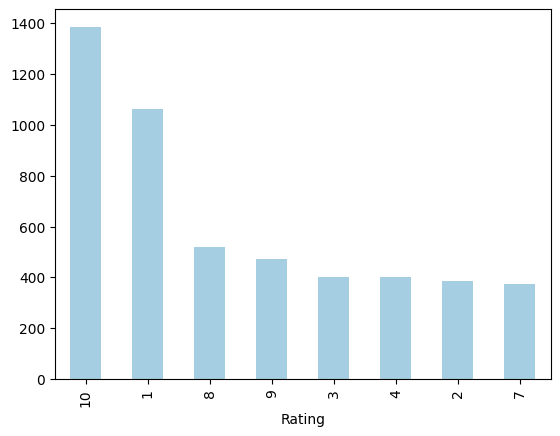

In [ ]:
axplot=mcommentDF.Rating.value_counts().plot(kind='bar', colormap='Paired')
plt.show()

<img src="./note.png" width = "" height = "" alt="note" align=left />

1.	As shown in the statistics, users are more preferrable to give high rating (ie. 8 or above), and the rating 10 is the highest rank.
2.	So, in order to have balance in the sample data rating, it is bet-ter to choose the sample set that with more even distribution.
3.	Of course, we can check the system performance first. If it is not as good as predicted, we can fine-tune the sampling method to enhance the system performance.

Here we’ll use the sentiment which has been already labeled.

6. Let's plot the distribution of the ratings:

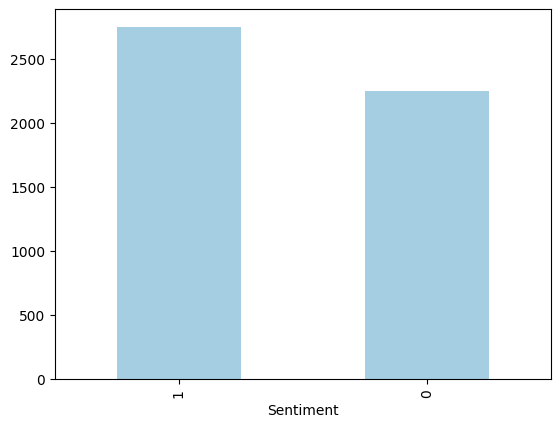

In [ ]:
axplot=mcommentDF.Sentiment.value_counts().plot(kind='bar', colormap='Paired')
plt.show()

<img src="./note.png" width = "" height = "" alt="note" align=left />

Note that the resulting rating distribution looks much better than the previous one. Still, the number of positive reviews is greater, but the number of negative reviews is significant as well, as can be seen from this plot.

After processing the dataset, we reduced it to a two-column dataset with nega-tive and positive ratings. We call mcommentDF.head() once again and the follow-ing is the result we get:

In [ ]:
mcommentDF.head()

,Review,Rating,Sentiment
0,"Kurt Russell's chameleon-like performance, cou...",10,1
1,It was extremely low budget(it some scenes it ...,8,1
2,James Cagney is best known for his tough chara...,8,1
3,"Following the brilliant ""Goy??kiba"" (aka. ""Han...",8,1
4,One of the last classics of the French New Wav...,10,1


<img src="./note.png" width = "" height = "" alt="note" align=left />

We'll finish our dataset exploration here. We saw the distribution of the review scores and the class categories. The dataset is now ready to be processed. We dropped the unused columns and converted review scores to binary class labels. Let's go ahead and start the training procedure!

### 14.5.3 Training the TextClassfier

Now, we're ready to start the training procedure. We'll train a binary text classifier with the multilabel classifier this time. Again, let's go step by step:

1. We start by importing the spaCy classes as follows:

In [ ]:
import spacy
import random
from spacy.training import Example
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL

2. Next, we'll create a pipeline object, <font color='blue'>nlp</font>, define the classifier configuration, and add the <font color='blue'>TextCategorizer</font> component to <font color='blue'>nlp</font> with the following configuration:

In [ ]:
nlp = spacy.load("en_core_web_md")

config = {
    "threshold": 0.5,
    "model": DEFAULT_MULTI_TEXTCAT_MODEL
}

tCategorizer = nlp.add_pipe("textcat_multilabel", config=config)

3. After the creation of the TextCategorizer object, we will create the movie comment sample object as a list and load all the user comments and the categories into it.

In [ ]:
movie_comment_exp = []

for idx, rw in mcommentDF.iterrows():
    comments = rw["Review"]
    rating = rw["Sentiment"]
    category = {"POS": True, "NEG": False} if rating == 1 else {"NEG": True, "POS": False}
    movie_comment_exp.append(Example.from_dict(nlp.make_doc(comments), {"cats": category}))

4. Let's check the <font color='blue'>movie_comment_exp</font>:

In [ ]:
movie_comment_exp[0]

{'doc_annotation': {'cats': {'POS': True, 'NEG': False}, 'entities': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], 'spans': {}, 'links': {}}, 'token_annotation': {'ORTH': ['Kurt', 'Russell', "'s", 'chameleon', '-', 'like', 'performance', ',', 'coupled', 'with', 'John', 'Carpenter', "'s", 'flawless', 'filmmaking', ',', 'makes', 'this', 'one', ',', 'with

5. We'll use <font color='blue'>POS</font> and <font color='blue'>NEG</font> labels for positive and negative sentiment, respectively. We'll introduce these labels to the new component and also initialize the component with examples:

In [ ]:
tCategorizer.add_label("POS")
tCategorizer.add_label("NEG")
tCategorizer.initialize(lambda: movie_comment_exp, nlp=nlp)

In [ ]:
tCategorizer

6. We're ready to define the training loop! We went over the training set for two epochs, but you can go over more if you like. The following code snippet will train the new text categorizer component:

In [ ]:
epochs = 2

with nlp.select_pipes(enable="textcat_multilabel"):
    optimizer = nlp.resume_training()
    for i in range(epochs):
        random.shuffle(movie_comment_exp)
        for exp in movie_comment_exp:
            nlp.update([exp], sgd=optimizer)

7. Finally, we'll test how the text classifier component works for two example sentences:

In [ ]:
test5 = nlp("This is the best movie that I have ever watched")

In [ ]:
test5.cats

In [ ]:
test6 = nlp("This movie is so bad")

In [ ]:
test6.cats

<img src="./note.png" width = "" height = "" alt="note" align=left />

Noted that both the <font color='blue'>NEG</font> and <font color='blue'>POS</font> labels appear in the prediction result because we used the multilabel classifier. The results look good. The first sentence outputs a very high positive probability, and the second sentence is predicted as negative with a high probability.

We've completed training spaCy's text classifier component.

In the next section, we'll dive into the world of a very popular deep learning library, Keras.

We'll explore how to write Keras code to do text classification by using another popular machine learning library – TensorFlow's Keras API.

Let's go ahead and explore Keras and TensorFlow!  

## 14.6. Artificial Neural Network in a Nutshell

In this last workshop section, we will learn how to incorporate spaCy technology with ANN (Artificial Neural Networks) technology by using TensorFlow and its Keras package.

Before that, let’s have a brief overview of a typical ANN.
A typical ANN consists of three layers:
1.	Input layer – consists of input neurons (nodes)
2.	Hidden layer – consists of hidden neurons (nodes)
3.	Output layer – consists of output neurons (nodes)

Through the provision of sufficient sample inputs and target outputs pairs of network training, the ANN will learn the knowledge by the update of its network weights.

After sufficient network training to a certain accuracy, the network can be use to predict (match) unseen inputs to the corresponding output result.

Fig. 14.4 shows a typical ANN architecture.

<img src="./Fig 14.4.jpg" width = "600" height = "" alt="Fig1" align=center />
Fig 14.4. A typical multi-layer Artificial Neural Network (ANN)



## 14.7 An overview of TensorFlow and Keras

<font color='blue'>TensorFlow</font> is an end-to-end open source platform for machine learning. TensorFlow might be the most popular deep learning library among research engineers and scientists. It has huge community support and great documentation, available at https://www.tensorflow.org/.

<font color='blue'>Keras</font> is a high-level deep learning API that can run on top of popular machine learning libraries such as <font color='blue'>TensorFlow</font>, <font color='blue'>Theano</font>, and <font color='blue'>CNTK</font>. <font color='blue'>Keras</font> is very popular in the research and development world because it supports rapid prototyping and provides a user-friendly API to neural network architectures.

<font color='blue'>TensorFlow 2</font> introduced great changes in machine learning methods by tightly integrating with <font color='blue'>Keras</font> and providing a high-level API, tf.keras. <font color='blue'>TensorFlow 1</font> was a bit ugly with symbolic graph computations and other low-level computations. With <font color='blue'>TensorFlow 2</font>, developers can take advantage of Keras' user-friendliness as well as TensorFlow's low-level methods.

Neural networks are commonly used for computer vision and NLP tasks, including object detection, image classification, and scene understanding as well as text classification, POS tagging, text summarization, and natural language generation.

In the following sections, we'll go through the details of a neural network architecture for text classification implemented with <font color='blue'>tf.keras</font>.
    
Throughout this section, we'll use <font color='blue'>TensorFlow 2</font> as we stated in the Technical requirements section.
    
Let's warm up to neural networks with some neural network basics, and then start building our <font color='blue'>Keras</font> code.

## 14.8 Neural Network Layers in Keras

A neural network is formed by connecting layers. <font color='blue'>Layers</font> are basically the building blocks of the neural network. A layer consists of several neurons, as in Fig. 4.

In Fig. 4, the first layer of this neural network has two layers, and the second layer has six neurons. Each neuron in each layer is connected to all neurons in the next layer.

Each layer might have different functionalities; some layers can lower the dimensions of their input, some layers can flatten their input (flattening means collapsing a multidimensional vector into one dimension), and so on. At each layer, we transform the input vectors and feed them to the next layer to get a final vector.   

<font color='blue'>Keras</font> provides different sorts of layers, such as <font color='blue'>input layers</font>, <font color='blue'>dense layers</font>, <font color='blue'>dropout layers</font>, <font color='blue'>embedding layers</font>, <font color='blue'>activation layers</font>, <font color='blue'>recurrent layers</font>, and so on. Let's get to know some useful layers one by one:

1. Input layer: The input layer is responsible for sending our input data to the rest of the network. While initializing an input layer, we provide the input data shape.
2. Dense layers: Dense layers transform the input of a given shape to the output shape we want. Layer 2 in Figure 8.8 represents a dense layer, which collapses a 5-dimensional input into a 1-dimensional output.
3. Recurrent layers: Keras provides strong support for RNN, GRU, and LSTM cells. If you're not familiar with RNN variations at all, please refer to the resources in the Technical requirements section. We'll use an LSTM layer in our code. The LSTM layer subsection contains the input and output shape information. In the next subsection, Sequential modeling with LSTMs, we'll get into details of modeling with LSTMs.   
4. Dropout layers: Dropout is a technique to prevent overfitting. Overfitting happens when neural networks memorize data instead of learning it. Dropout layers randomly select a given number of neurons and set their weights to zero for the forward and backward passes, that is, for one iteration. We usually place dropout layers after dense layers.

These are the basic layers that are used in NLP models. The next subsection is devoted to modeling sequential data with LSTMs, which is the core of statistical modeling for NLP.

## 14.8 Sequential Modeling with LSTM Technology

<font color='blue'>LSTM (Long-Short-Term-Memory)</font> is an <font color='blue'>RNN (Recurrent Neural Network)</font> variation.

<font color='blue'>RNNs</font> are special neural networks that can process sequential data in steps.

In usual neural networks, we assume that all the inputs and outputs are independent of each other. Of course, it's not true for text data. Every word's presence depends on the neighbor words.

For example, during a machine translation task, we predict a word by considering all the words we predicted before. <font color='blue'>RNNs</font> capture information about the past sequence elements by holding a memory (called hidden state).

Fig. 14.5 shows a well-known illustration of <font color='blue'>RNNs</font>. The loop on the left-hand side of the figure explains that an <font color='blue'>RNN</font> feeds the output of the previous step to itself as the current input. The right-hand side of the figure shows the unrolled version of the <font color='blue'>RNN</font> diagram. At each time step, i, we feed the input word xi, and <font color='blue'>RNN</font> outputs a value, hi, for this time step:

<img src="./Fig 14.5.jpg" width = "600" height = "" alt="Fig1" align=center />
Fig 14.5. RNN with LSTM Technology

<font color='blue'>LSTMs</font> were invented to fix some computational problems of <font color='blue'>RNNs</font> have the problem of forgetting some data back in the sequence, as well as some numerical stability issues due to chain multiplications called vanishing and exploding gradients. If you are interested, you can refer to Colah's blog, the link to which you will find in the References section.

An <font color='blue'>LSTM</font> cell is slightly more complicated than an <font color='blue'>RNN</font> cell, but the logic of computation is the same: we feed one input word at each time step and <font color='blue'>LSTM</font> outputs an output value at each time step. The following diagram shows what's inside an <font color='blue'>LSTM</font> cell. Note that the input steps and output steps are identical to the <font color='blue'>RNN</font> counterparts:

<img src="./Fig 14.6.jpg" width = "600" height = "" alt="Fig1" align=center />
Fig 14.6. Detail architecture of LSTM cell

<font color='blue'>Keras</font> has extensive support for the <font color='blue'>RNN</font> variations <font color='blue'>GRU</font> and <font color='blue'>LSTM</font>, as well as a simple API for training <font color='blue'>RNNs</font>. <font color='blue'>RNN</font> variations are crucial for NLP tasks, as language data's nature is sequential: text is a sequence of words, speech is a sequence of sounds, and so on.

Now that we have learned what type of statistical model to use in our design, we can switch to a more practical subject: how to represent a sequence of words. In the next section, we'll learn how to transform a sequence of words into a sequence of word IDs and build vocabularies at the same time with <font color='blue'>Keras's</font> preprocessing module.

## 14.9 Keras Tokenizer in NLP

As we remarked in the previous section, text is sequential data (a sequence of words or characters). We'll feed a sentence as a sequence of words. Neural networks can work only with vectors, so we need a way to vectorize the words.

In the previous workshop, Working with Word Vectors and Semantic Similarity, we saw how to vectorize words with word vectors. A word vector is a continuous representation of a word. In order to vectorize a word, we follow these steps:

1. We tokenize each sentence and turn sentences into a sequence of words.
2. We create a vocabulary from the set of words present in step 1. These are words that are supposed to be recognized by our neural network design.
3. Creating a vocabulary should assign an ID to each word.
4. Then word IDs are mapped to word vectors.

Let's look at a short example. We can work on a small corpus of three sentences

In [ ]:
testD = [
"I am going to buy some gift for Christmas tomorrow morning.",
"Yesterday my mom cooked a wonderful meal.",
"John promised he would remember to turn off the lights."
]

In [ ]:
testD

Let's first tokenize the words into sentences:

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")
utterances = [[token.text for token in nlp(utterance)] for utterance in testD]
for utterance in utterances:
    utterance

<img src="./note.png" width = "" height = "" alt="note" align=left />

In the preceding code, we iterated over all tokens of the Doc object generated by calling nlp(sentence). Notice that we didn't filter out the punctuation marks. Filtering punctuation depends on the task. For instance, in sentiment analysis, punctuation marks such as "!" correlate to the result. In this example, we'll keep the punctuation marks as well.

In the next step, we will try to create vocabularies and token sequences into to-ken-ID sequences by using Tokenizer, as shown:

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
ktoken = Tokenizer(lower=True)

In [ ]:
ktoken.fit_on_texts(testD)
ktoken

In [ ]:
ktoken.word_index

<img src="./note.png" width = "" height = "" alt="note" align=left />

In the above codes, we did the following:
1. We imported Tokenizer from the Keras text preprocessing module.
2. We created a tokenizer object (ktoken) with the parameter lower=True, which means tokenizer should lower all words while building the vocabulary.
3. We called ktoken.fit_on_texts on data to build the vocabulary. fit_on_text works on a sequence of tokens; input should al-ways be a list of tokens.
4. We examined the vocabulary by printing ktoken.word_index. Word_index is basically a dictionary where keys are vocabu-lary tokens and values are token-IDs.


To retrieve the token ID, we call ktoken.texts_to_sequences() method.

Notice that the input to this method should always be a list, even if we want to feed only one token.

In the following code segment, we feed one-word input as a list (notice the list brackets):

In [ ]:
ktoken.texts_to_sequences(["Christmas"])

In [ ]:
ktoken.texts_to_sequences(["cooked", "meal"])

<img src="./note.png" width = "" height = "" alt="note" align=left />

1.	We also notice that the token-IDs start from 1, not 0. 0 is a re-served value and has a special meaning, which means a pad-ding value.
2.	Keras cannot process utterances of different lengths, hence we need to pad all the utterances.
3.	We pad each sentence of the dataset to a maximum length by adding padding utterances either to the start or end of it.
4.	Keras inserts 0 for the padding, which means it's not a real to-ken, but a padding value.

Keras inserts 0 for the padding, which means it's not a real word, but a padding value. Let's understand padding with a simple example:

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
seq_utterance = [[7], [8,1], [9,11,12,14]]

# Define Maximum Length (MLEN)
MLEN=4
pad_sequences(seq_utterance, MLEN, padding="post")

In [ ]:
pad_sequences(seq_utterance, MLEN, padding="pre")

We called pad_sequences on this list of sequences and every sequence is pad-ded with zeros such that its length reaches MAX_LEN=4, the length of the longest sequence.

We can pad the sequences from the right or left with the post and pre options. In the preceding code, we padded our sentences with the post option, hence the sentences are padded from the right.

If we put it all together, the complete text preprocessing steps are as follows:

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
ktoken = Tokenizer(lower=True)
ktoken.fit_on_texts(testD)
sutterance = ktoken.texts_to_sequences(testD)
MLEN=7
pseq_utterance = pad_sequences(sutterance, MLEN, padding="post")
pseq_utterance

<img src="./note.png" width = "" height = "" alt="note" align=left />

Now, we've transformed utterances into a sequence of token-IDs. We've come one step closer to vectorizing the tokens. In the next subsection, we'll finally transform these tokens into vectors. Then our utterances will be ready to be fed into the neural network.

### Embedding words

We're ready to transform words into word vectors. Embedding words into vectors happens via an <font color='blue'>embedding table</font>.

An <font color='blue'>embedding table</font> is basically a lookup table. Each row holds the word vector of a word. We index the rows by <font color='blue'>word-IDs</font>, hence the flow of obtaining a word's word vector is as follows:

1. <font color='blue'>word->word-ID</font>: In the previous section, we obtained a <font color='blue'>word-ID</font> for each word with <font color='blue'>Keras' Tokenizer</font>. <font color='blue'>Tokenizer</font> holds all the vocabulary and maps each vocabulary word to an ID, which is an integer.
2. <font color='blue'>word-ID->word vector</font>: A <font color='blue'>word-ID</font> is an integer and therefore can be used as an index to the embedding table's rows. Each <font color='blue'>word-ID</font> corresponds to one row and when we want to get a word's word vector, we first obtain its <font color='blue'>word-ID</font> and then do a lookup in the embedding table rows with this word-ID.

The following diagram shows how embedding words into word vectors works:

<img src="./Fig 14.7.jpg" width = "600" height = "" alt="Fig1" align=center />
Fig 14.7. A sample of embedding words into word vectors

Remember that in the previous section, we started with a list of sentences. Then we did the following:
1. We broke each sentence into words and built a vocabulary with Keras' Tokenizer.
2. The Tokenizer object held a word index, which was a word->word-ID mapping.
3. After obtaining the word-ID, we could do a lookup to the embedding table rows with this word-ID and got a word vector.
4. Finally, we fed this word vector to the neural network.

Training a neural network is not easy. We have to take several steps to transform sentences into vectors.

After these preliminary steps, we're ready to design the neural network architecture and do the model training.

## 14.10 Movie Sentiment Analysis with LTSM using Keras and spaCy

In this section, we will design the LSTM-based RNN for our text classifier for sentiment analysis. We'll follow these steps to train the classifier:

1.	Data retrieve and preprocessing.
2.	Tokenize the review utterances with padding.
3.	Create the pad sequence of utterances and input them into the Input Lay-er.
4.	Vectorize each token by check with the token-ID in the Embedding Layer.
5.	Input these token vectors into the LSTM
6.	Train the LSTM network

Let's get started by remembering the dataset again.


### Step 1: Dataset

We'll use the same IMDB movie reviews dataset from the sentiment analysis with spaCy section. We already processed the dataset with pandas in that section and reduced it to two columns and binary labels.

Reload the reviews table and perform the data preprocessing as done in the pre-vious section to ensure the data is up to date:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
mcommentDF=pd.read_csv('imdb_5000.csv')
mcommentDF = mcommentDF[['Review','Sentiment']].dropna()
axplot=mcommentDF.Sentiment.value_counts().plot(kind='bar', colormap='Paired')
plt.show()

Here are how the mcommentDF dataset looks:

In [ ]:
mcommentDF.head()

Next, we'll transform our dataset a bit. We'll extract the review text and review label from each dataset row and append them into Python lists:

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")

In [ ]:
movie_comment_exp = []
categories = []

for idx, rw in mcommentDF.iterrows():
    comments = rw["Review"]
    rating = rw["Sentiment"]
    categories.append(rating)
    mtoks = [token.text for token in nlp(comments)]
    movie_comment_exp.append(mtoks)

In [ ]:
movie_comment_exp[0]

<img src="./note.png" width = "" height = "" alt="note" align=left />

Notice that we appended a list of words to train_examples, hence each element of this Notice that we appended a list of words to movie_comment_exp, hence each element of this list is a list of tokens. Next, we'll invoke Keras' Tokenizer on this list of tokens to build our vocabulary.

### Step 2: Data and vocabulary preparation

We already processed our dataset, hence we are ready to tokenize the dataset sentences and create a vocabulary. Let's go step by step:

1. First, we'll do the necessary imports:

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

2. We're ready to fit the <font color='blue'>ktoken</font> object on our list of words. First, we'll fit the <font color='blue'>ktoken</font>, then we'll convert words to their IDs by calling <font color='blue'>texts_to_sequences</font>:

In [ ]:
ktoken = Tokenizer(lower=True)
ktoken.fit_on_texts(movie_comment_exp)

seq_utterance = ktoken.texts_to_sequences(movie_comment_exp)

3. Then, we'll pad the short utterance sequences to a maximum length of 50. Also, this will truncate long reviews to a length of 50 words:

In [ ]:
MLEN = 50

ps_utterance = pad_sequences(seq_utterance, MLEN, padding="post")

4. Finally, we'll convert this list of reviews and the labels to numpy arrays:

In [ ]:
ps_utterance = np.array(ps_utterance)
catlist = np.array(categories)

In [ ]:
catlist = catlist.reshape(catlist.shape[0] , 1)

In [ ]:
catlist.shape

Up to now, all the basic preparation works are done. We are now ready to create our LSTM network and input data into it.

First thing first, load the TensorFlow Keras related modules:

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras import optimizers

### Step 3: Implement the Input Layer

In [ ]:
utterance_input = Input(shape=(None,))

<img src="./note.png" width = "" height = "" alt="note" align=left />

Don't be confused by <font color='blue'>None</font> as the input shape. Here, <font color='blue'>None</font> means that this dimension can be any scalar number, hence, we use this expression when we want Keras to infer the input shape.

### Step 4: Implement the Embedding Layer

Create the Embedding-Layer as follows:

In [ ]:
embedding =  Embedding(input_dim = len(ktoken.word_index)+1,
                       output_dim = 100)(utterance_input)

<img src="./note.png" width = "" height = ""

1.   List item
2.   List item

alt="note" align=left />

1.	While defining the embedding layer, the input dimension should always be the number of tokens in the vocabulary (here, there's a plus 1 because the indices start from 1, not 0. Index 0 is reserved for the padding value).
2.	Here, we chose the output shape to be 100, hence the token vectors for the vocabulary tokens will be 100-dimensional. Popular numbers for token vector dimensions are 50, 100, and 200 depending on the complexity of the task.

### Step 5: Implement the LSTM Layer

Create the LSTM_Layer:

In [ ]:
LSTM_layer = LSTM(units=256)(embedding)

<img src="./note.png" width = "" height = "" alt="note" align=left />

Here, the units = 256 is the dimension of the hidden state.
The LSTM output shape and hidden state shape are the same due in the LSTM architecture.

### Step 6: Implement the Output Layer

We obtained a 256-dimensional vector from the LSTM layer and we want to squash it to a 1-dimensional vector (possible values of this vector are 0 and 1, which are the class labels):

In [ ]:
outlayer = Dense(1, activation='sigmoid')(LSTM_layer)

<img src="./note.png" width = "" height = "" alt="note" align=left />

We used sigmoid function as the Activation Function in output layer. The sigmoid function is an S-shaped function and maps its input to a [0-1] range and is commonly used in many neural networks.

### Step 7: System Compilation

After defining the model, we need to compile it with an optimizer, a loss function, and an evaluation metric:

In [ ]:
imdb_mdl = Model(inputs=[utterance_input],outputs=[outlayer])

So far so good.
Now, take a look on the imdb_mdl model setup:

In [ ]:
imdb_mdl.summary()

Next, invoke the model compilation:

In [ ]:
imdb_mdl.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

<img src="./note.png" width = "" height = "" alt="note" align=left />

1.	For the imdb_mdl LSTM model, we apply the ADAM (Adap-tive Moment Estimation) as the optimizer for LSTM training, which is commonly used in many LSTM model training.  
2.	Also, we use binary cross-entropy as loss function, which is also commonly used in many Keras training models. You can find the list of loss functions on the Keras website at https://keras.io/api/losses/.
3.	A list of supported performance metrics can be found in Keras official site at https://keras.io/api/metrics/.

### Step 8: Model Fitting and experiment evaluation

Finally, we'll fit the imdb_mdl model on our data with 5 epochs to save time:

In [ ]:
imdb_mdl.fit(x=ps_utterance,
          y=catlist,
          batch_size=64,
          epochs=5,
          validation_split=0.3)

<img src="./note.png" width = "" height = "" alt="note" align=left />

1.	Here, x is the list of ps_utterance for network training and y is the list of category (catlist). We want to make 5 passes over the data, hence we set the epochs parameter to 5.
2.	We went over the data 5 times in batch sizes of 64. Usually, we don't fit all of the dataset into the memory at once (due to memory limitations). Also, the parameter batch_size=64 means we want to feed a batch of 64 training utterances at a time.
3.	The validation_split = 0.3 is used meaning with we use 70% of the dataset for training and 30% for system validation.
4.	In summary, our experiment validation accuracy is 0.7793, which is quite good for such a basic LSTM network training for only 5 epochs.


<img src="./workshop.png" width = "" height = "" alt="note" align=left />

### Lab Task 2 Further Exploration of LSTM model for Movie Sentiment Analysis

Based on the implementation we have done in this LSTM Lab, we encourage you to experiment more on different settings and simulation.
1. Follow the same logic on Workshop 14.1, by using the rating (0 - 10) field of the IMDB movie review dataset. Try to re-construct the LSTM for sentiment analysis of movie review into 3 category: Positive, Neutral and Negative.
2. Check the training performance.
3. You can experiment with the code more by placing dropout layers at different locations (such as after the embedding layer or after the LSTM layer).
4. Another way of experimenting is to try different values for the embedding dimensions, such as 50, 150, and 200, and observe the change in the accuracy.
4. The same applies to the LSTM layer's hidden dimension – you can experiment with different values instead of 256.
For each,try different parameters and do the simulations, see whether you can find the best configuration.

## 14.10 Summary

In this Lab, we have conducted a popular NLP topic – text classification and the application on sentiment analysis.

In this workshop, you first learned about text classification concepts such as bi-nary classification, multilabel classification, and multiclass classification.

Next, you learned how to train TextCategorizer, spaCy's text classifier compo-nent. You learned how to transform your data into spaCy training format and then train the TextCategorizer component with this data.

After learning text classification with spaCy's TextCategorizer, in the final sec-tion, you learned how to combine spaCy code and Keras code.

First, you learned the basics of neural networks, including some handy layers such as the dense lay-er, dropout layer, embedding layer, and recurrent layers.

Then, you learned how to tokenize and preprocess the data with Keras' Tokenizer.

Finally, you went through neural network design with tf.keras code. You learned how to design and evaluate a statistical experiment with LSTM.

Looks like a lot! Indeed, it is a lot of material; no worries if it takes time to digest. Practicing text classification can be intense, but in the end, you earn crucial NLP skills!
